# Лабораторная работа №2 

---
**Цель работы: Изучение связи между признаками двумерного набора данных, визуализация данных.**

---

**Для начала требовалось импортировать библиотеки для выполнения лабораторной работы**

In [15]:
import pandas as pd
import seaborn as sns

**pandas - для анализа данных
seaborn — это библиотека для создания статистических графиков**

Следующим шагом стало чтение данных файла

In [22]:
df = pd.read_csv('clients2.csv', sep=';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,NumDealsPurchases
0,5524,1957,Graduation,Single,58138.0,0.0,04.09.2012,3.0
1,2174,1954,Graduation,Single,46344.0,1.0,08.03.2014,2.0
2,4141,1965,Graduation,Together,71613.0,0.0,21.08.2013,1.0
3,6182,1984,Graduation,Together,26646.0,1.0,10.02.2014,2.0
4,5324,1981,PhD,Married,58293.0,1.0,19.01.2014,5.0


**Перед выполнением упражнений было сочтено уместным проверить записи в файле на явные и неявные дубликаты, так как они будут мешать при составлении диаграмм, осложняя их восприятие.**

In [17]:
display(df[df.duplicated()])
print(f"duplicates quantity: {df.duplicated().sum()}") 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,NumDealsPurchases
792,2853,1980,Graduation,Single,51766.0,1.0,11.03.2014,2.0
793,2853,1980,Graduation,Single,51766.0,1.0,11.03.2014,2.0
794,2853,1980,Graduation,Single,51766.0,1.0,11.03.2014,2.0
795,2853,1980,Graduation,Single,51766.0,1.0,11.03.2014,2.0


duplicates quantity: 4


**Так как выявлено 4 явных дубликата, их следует удалить, но при этом также необходимо обновить индексацию, поэтому применим метод «reset_index»** 

In [70]:
df = df.drop_duplicates().reset_index()
print(f"duplicates quantity: {df.duplicated().sum()}") 

duplicates quantity: 0


**Далее перейдём к проверке неявных дубликатов. Выводим все уникальные значения столбцов для выявления похожих значений и соответствующего их удаления. С учетом информативного содержания, интересующими столбцами являются 'Education', 'Marital_Status'.**

In [11]:
def display_implicit_duplicates():  # Выполнено в виде функции, чтобы применять несколько раз
    for col in df.columns:
        if col == 'Education' or col == 'Marital_Status':  # Выводим только информативные столбцы
            print(col, df[col].unique())

display_implicit_duplicates()

Education ['Graduation' 'PhD' 'Master' 'Basic']
Marital_Status ['Single' 'Together' 'Married' 'Divorced' 'MARRIED' 'SINGL' 'Widow'
 'Alone']


**Теперь, произведём замену неявных дубликатов на соответствующие варианты. Также отобразим уникальные значения, чтобы проверить, что замена прошла корректно.**

In [24]:
df['Marital_Status'] = df['Marital_Status'].replace(
    'SINGL', 'Single'
).replace(
    'MARRIED', 'Married'
)

display_implicit_duplicates()

Education ['Graduation' 'PhD' 'Master' 'Basic']
Marital_Status ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone']


**Последним шагом удалим строки с пустыми значениями, так как они тоже мешают объективному восприятию информации**

In [73]:
df = df.dropna().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   level_0            780 non-null    int64  
 1   index              780 non-null    int64  
 2   ID                 780 non-null    int64  
 3   Year_Birth         780 non-null    int64  
 4   Education          780 non-null    object 
 5   Marital_Status     780 non-null    object 
 6   Income             780 non-null    float64
 7   Kidhome            780 non-null    float64
 8   Dt_Customer        780 non-null    object 
 9   NumDealsPurchases  780 non-null    float64
dtypes: float64(3), int64(4), object(3)
memory usage: 61.1+ KB


**После устранения дубликатов перейдём к выполнению упражнений.**

---
## Задание 1. Построение диаграммы по семейному статусу и количеству детей
---

**`Текст задания: Использовать seaborn. По группировке - количество клиентов по количеству детей и по каждому семейному статусу (marital_status) построить диаграмму.`**

**После выполнения предварительных действий можно было приступать к заданиям. В первом задании требовалось построить диаграмму, отображающую распределение клиентов по их семейному статусу и количеству детей. Данная диаграмма может помочь определить распределение клиентов для более персонализированной рекламы.**

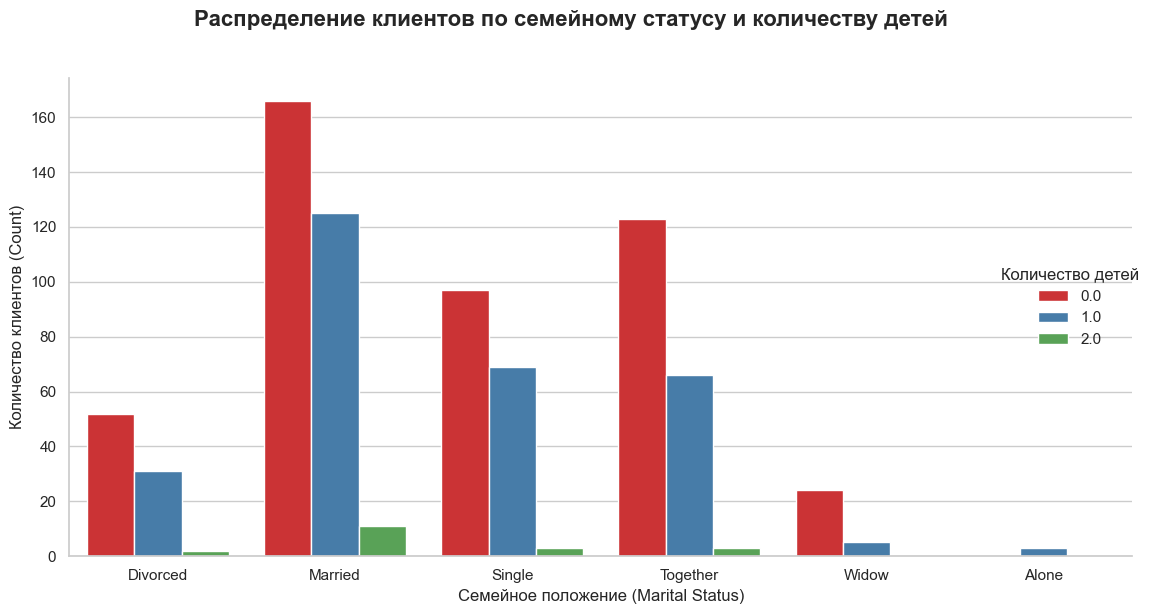

In [74]:
# Группируем по 'Kidhome' и 'Marital_Status' и подсчитываем количество клиентов ('Count').
grouped_df = df.groupby(['Kidhome', 'Marital_Status']).size().reset_index(name='Count')

# Создаем сгруппированную столбчатую диаграмму с помощью sns.catplot
# x - Семейное положение, hue - Количество детей, y - Количество клиентов
g = sns.catplot(
    data=grouped_df,
    kind="bar",
    x="Marital_Status",
    y="Count",
    hue="Kidhome",
    height=6,          # Высота графика
    aspect=1.8,        # Соотношение сторон
    palette="Set1" # Красивая палитра
)

# Настройка заголовков и подписей
g.fig.suptitle('Распределение клиентов по семейному статусу и количеству детей', y=1.02, fontsize=16, fontweight='bold')
g.set_axis_labels("Семейное положение (Marital Status)", "Количество клиентов (Count)", fontsize=12)

# Настройка легенды
g._legend.set_title("Количество детей")

# Отображение графика.
plt.tight_layout()
plt.show()

---
## Задание 2. Построение графика. Отображение минимального дохода в зависимости от образования.
---

**`Текст задания: Использовать pandas и plot. По сводной таблице (pivot_table) - отобразить минимальный доход по образованию. Отобразить маркеры в виде ⬤ красного цвета размером 18.`**

**В данном задании требовалось отобразить зависимость минимального количества дохода от образования на графике. Так как в методичке на примере отображалось среднее количество дохода от образования, что отличалось от названия задания, было принято решение построить два соответствующих графика.**

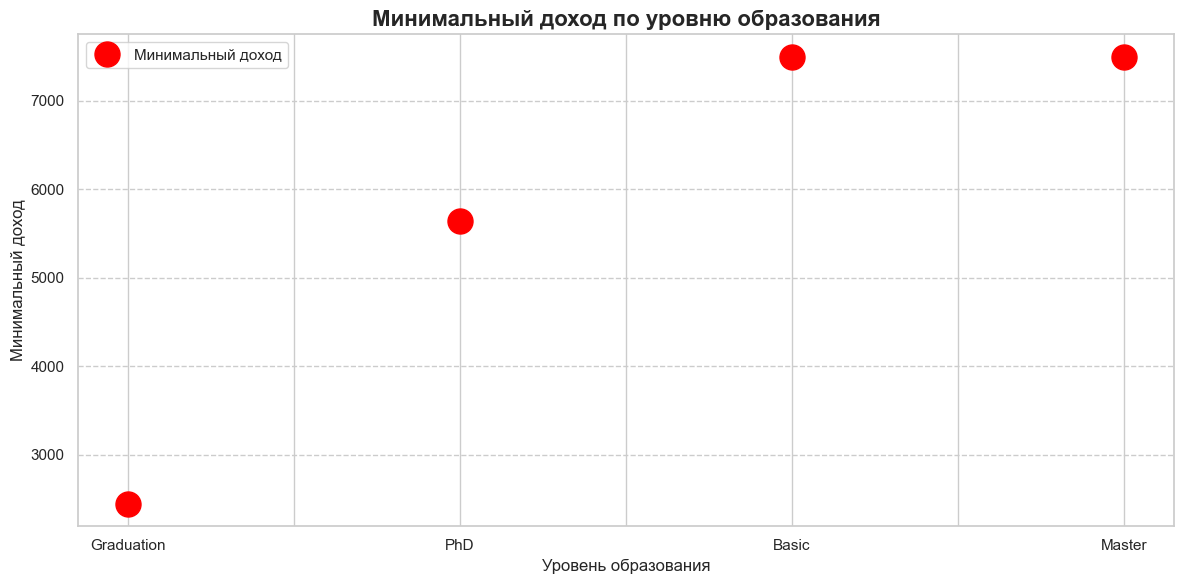

In [75]:
# Рассчитываем минимальное значение дохода ('Income') для каждого уровня образования ('Education').
min_income_by_education = pd.pivot_table(
    df,
    values='Income',
    index='Education',
    aggfunc='min'
).sort_values(by='Income', ascending=True)

plt.figure(figsize=(12, 6)) # Создаем новую область для графика определённого размера, для того чтобы подогнать под ширину экрана

min_income_by_education.plot(
    kind='line',
    ax=plt.gca(), # Рисуем на текущих осях
    marker='o',   # Маркер в виде круга
    markersize=18, # Размер маркера
    color='red',  # Цвет линии и маркеров
    linewidth=0   # Толщина линии
)

# Настройка заголовков и подписей для нового графика
plt.title('Минимальный доход по уровню образования', fontsize=16, fontweight='bold')
plt.xlabel('Уровень образования', fontsize=12)
plt.ylabel('Минимальный доход', fontsize=12)

plt.legend(['Минимальный доход'], loc='best')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

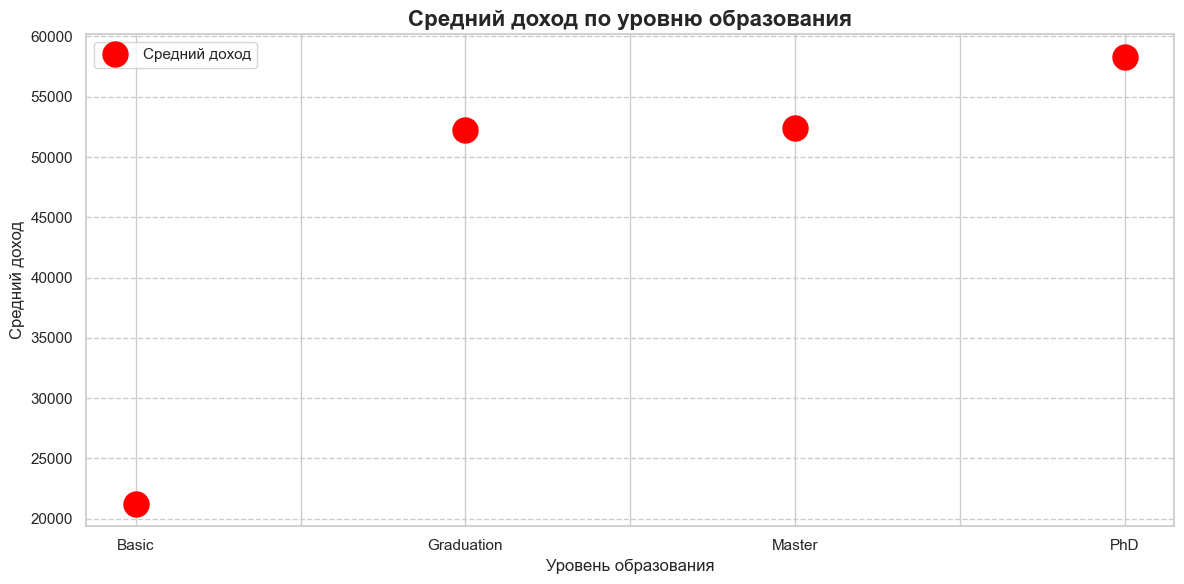

In [76]:
# Рассчитываем среднее значение дохода ('Income') для каждого уровня образования ('Education').
min_income_by_education = pd.pivot_table(
    df,
    values='Income',
    index='Education',
    aggfunc='mean'
).sort_values(by='Income', ascending=True)

plt.figure(figsize=(12, 6)) # Создаем новую область для графика определённого размера, для того чтобы подогнать под ширину экрана

min_income_by_education.plot(
    kind='line',
    ax=plt.gca(), # Рисуем на текущих осях
    marker='o',   # Маркер в виде круга
    markersize=18, # Размер маркера
    color='red',  # Цвет линии и маркеров
    linewidth=0   # Толщина линии
)

# Настройка заголовков и подписей для нового графика
plt.title('Средний доход по уровню образования', fontsize=16, fontweight='bold')
plt.xlabel('Уровень образования', fontsize=12)
plt.ylabel('Средний доход', fontsize=12)

plt.legend(['Средний доход'], loc='best')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

---
## Задание 3. Построение круговой диаграммы.
---

**`Текст задания: Использовать matplotlib. Отфильтровать клиентов по year_birth больше 1980. Построить круговую диаграмму, которая отображает процент клиентов каждого семейного положения.`**

**В данном задании требовалось составить круговую диаграмму, которая отобразила бы процент клиентов с различным семейным положением. Это необходимо для составления стратегии компании, чтобы ориентироваться на целевую аудиторию.** 

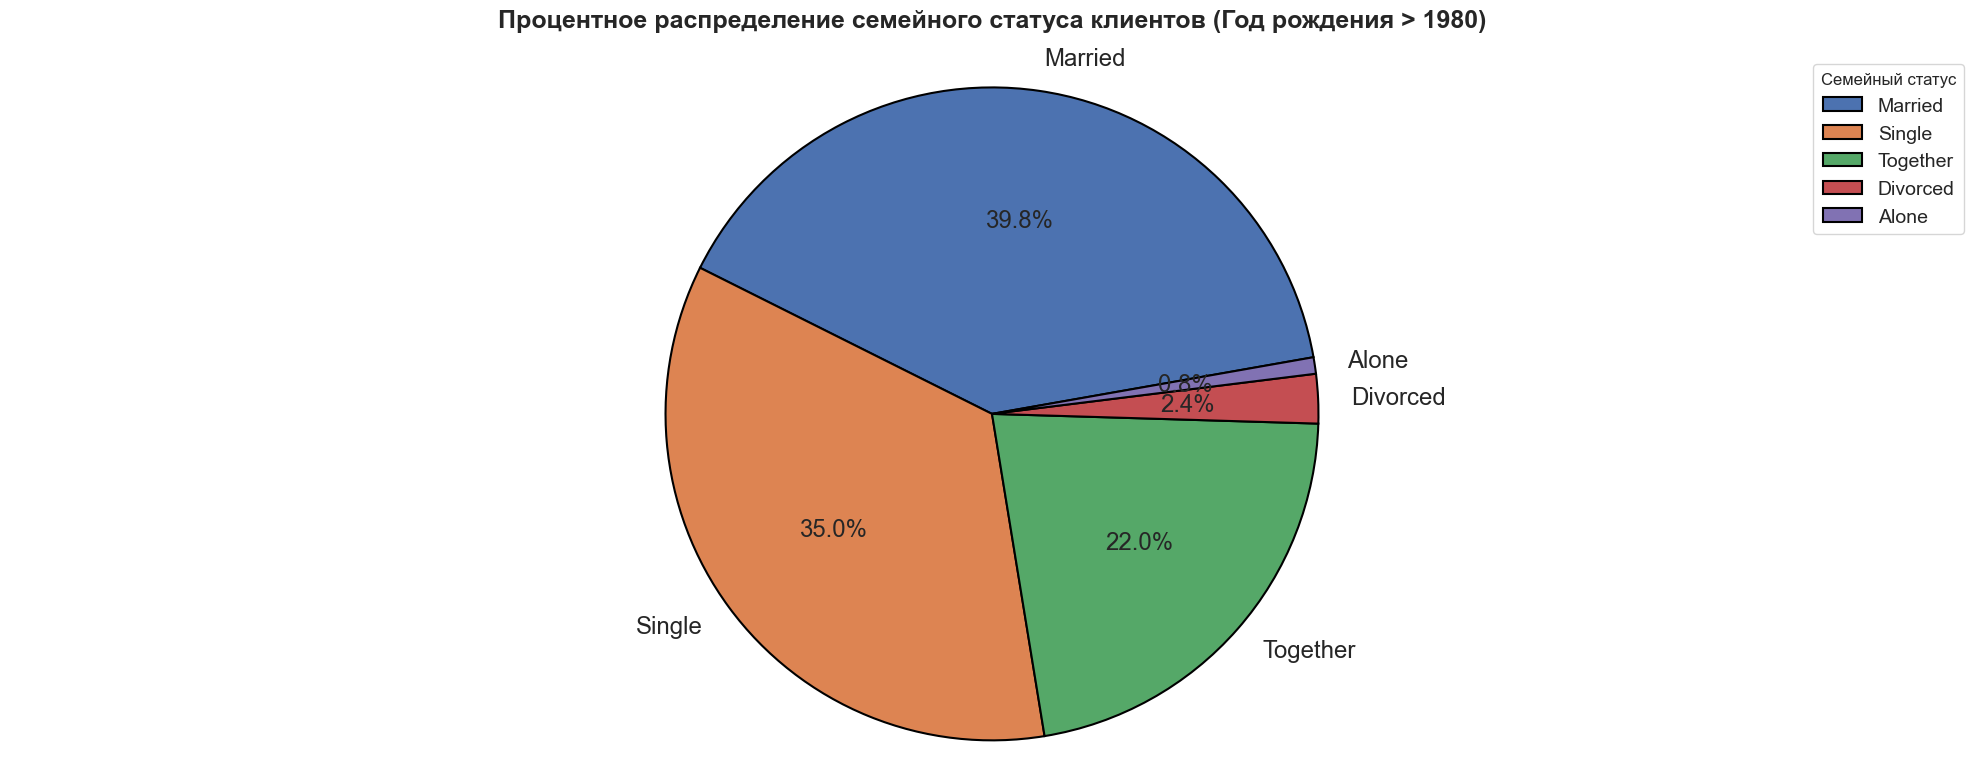

In [77]:
filtered_df = df[df['Year_Birth'] > 1980].copy()

# Используем value_counts() для получения количества клиентов в каждой категории.
marital_status_counts = filtered_df['Marital_Status'].value_counts()

plt.figure(figsize=(20, 8)) # Создаем новую область для графика определённого размера, для того чтобы подогнать под ширину экрана

# Построение круговой диаграммы
plt.pie(
    marital_status_counts,
    labels=marital_status_counts.index, # Подписи секторов - Семейный статус
    autopct='%1.1f%%',                  # Формат отображения процентов
    startangle=10,                      # Поворот графика для того, чтобы рассмотреть доли "Alone" и "Divorced"
    textprops={'size': 'x-large'},      # Увеличение размера шрифта текста
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5} # Добавляем обводку секторов
)

# Добавление заголовка
plt.title('Процентное распределение семейного статуса клиентов (Год рождения > 1980)', fontsize=18, fontweight='bold', pad=20)

# Добавление легенды
plt.legend(
    marital_status_counts.index, 
    title="Семейный статус", 
    loc="best", 
    fontsize=14, 
    bbox_to_anchor=(1, 1)
)

# Обеспечение, что круг имеет круглую форму
plt.axis('equal') 
plt.tight_layout()
plt.show()

---
## Вывод
---

**В ходе выполнения лабораторной работы производилась работа с библиотеками seaborn и pandas, улучшены навыки работы в Jupyter notebook. Также было изучено построение различных графиков и диаграмм, что просто необходимо для визуализации информации. Полученные навыки крайне полезны в дальнейшей профессиональной деятельности.**